In [73]:
import pandas as pd
import numpy as np
import emoji

In [74]:
import cufflinks as cf
from PIL.Image import open as open_wordcloud
pd.set_option('display.max_columns',100)
cf.go_offline()

In [75]:
data_tweets=pd.read_csv('../data/text/Corona_NLP_train.csv',encoding='latin-1')

In [76]:
data_tweets

UserName  ScreenName                      Location     TweetAt  \
0          3799       48751                        London  16-03-2020   
1          3800       48752                            UK  16-03-2020   
2          3801       48753                     Vagabonds  16-03-2020   
3          3802       48754                           NaN  16-03-2020   
4          3803       48755                           NaN  16-03-2020   
...         ...         ...                           ...         ...   
41152     44951       89903  Wellington City, New Zealand  14-04-2020   
41153     44952       89904                           NaN  14-04-2020   
41154     44953       89905                           NaN  14-04-2020   
41155     44954       89906                           NaN  14-04-2020   
41156     44955       89907  i love you so much || he/him  14-04-2020   

                                           OriginalTweet           Sentiment  
0      @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...             Neutral  
1      advice Talk to your neighbours family to excha...            Positive  
2      Coronavirus Australia: Woolworths to give elde...            Positive  
3      My food stock is not the only one which is emp...            Positive  
4      Me, ready to go at supermarket during the #COV...  Extremely Negative  
...                                                  ...                 ...  
41152  Airline pilots offering to stock supermarket s...             Neutral  
41153  Response to complaint not provided citing COVI...  Extremely Negative  
41154  You know itÂs getting tough when @KameronWild...            Positive  
41155  Is it wrong that the smell of hand sanitizer i...             Neutral  
41156  @TartiiCat Well new/used Rift S are going for ...            Negative  

[41157 rows x 6 columns]

In [77]:
data_tweets['Sentiment'].value_counts(1)

Positive              0.277523
Negative              0.240955
Neutral               0.187404
Extremely Positive    0.160945
Extremely Negative    0.133173
Name: Sentiment, dtype: float64

In [78]:
diccionario_replace={'Extremely Positive':'Positive','Extremely Negative':'Negative'}

In [79]:
data_tweets.Sentiment=data_tweets.Sentiment.replace(diccionario_replace)

In [80]:
data_tweets['Sentiment'].value_counts(1)

Positive    0.438467
Negative    0.374128
Neutral     0.187404
Name: Sentiment, dtype: float64

In [81]:
data=data_tweets[data_tweets['Sentiment'].isin(['Positive','Negative'])].copy()

In [82]:
data.reset_index(drop=True,inplace=True)

In [83]:
data

UserName  ScreenName                      Location     TweetAt  \
0          3800       48752                            UK  16-03-2020   
1          3801       48753                     Vagabonds  16-03-2020   
2          3802       48754                           NaN  16-03-2020   
3          3803       48755                           NaN  16-03-2020   
4          3804       48756     ÃT: 36.319708,-82.363649  16-03-2020   
...         ...         ...                           ...         ...   
33439     44949       89901                          OHIO  14-04-2020   
33440     44950       89902                           NaN  14-04-2020   
33441     44952       89904                           NaN  14-04-2020   
33442     44953       89905                           NaN  14-04-2020   
33443     44955       89907  i love you so much || he/him  14-04-2020   

                                           OriginalTweet Sentiment  
0      advice Talk to your neighbours family to excha...  Positive  
1      Coronavirus Australia: Woolworths to give elde...  Positive  
2      My food stock is not the only one which is emp...  Positive  
3      Me, ready to go at supermarket during the #COV...  Negative  
4      As news of the regionÂs first confirmed COVID...  Positive  
...                                                  ...       ...  
33439  I never that weÂd be in a situation &amp; wor...  Positive  
33440  @MrSilverScott you are definitely my man. I fe...  Positive  
33441  Response to complaint not provided citing COVI...  Negative  
33442  You know itÂs getting tough when @KameronWild...  Positive  
33443  @TartiiCat Well new/used Rift S are going for ...  Negative  

[33444 rows x 6 columns]

In [84]:
data['Location'].value_counts()

London                         435
United States                  416
London, England                413
Washington, DC                 317
New York, NY                   302
                              ... 
Somewhere On Earth ?             1
Isle Of White                    1
Coldwater, MI                    1
Key Biscayne, FL, US, 33149      1
Warsaw, Berlin                   1
Name: Location, Length: 10465, dtype: int64

In [85]:
data['TweetAt']=pd.to_datetime(data['TweetAt'])

In [86]:
data.describe(np.arange(.1,1,.1))

UserName    ScreenName
count  33444.000000  33444.000000
mean   24233.721863  69185.721863
std    11875.552641  11875.552641
min     3800.000000  48752.000000
10%     7854.300000  52806.300000
20%    11929.600000  56881.600000
30%    15979.800000  60931.800000
40%    20034.200000  64986.200000
50%    24159.500000  69111.500000
60%    28262.800000  73214.800000
70%    32398.200000  77350.200000
80%    36606.400000  81558.400000
90%    40773.700000  85725.700000
max    44955.000000  89907.000000

In [87]:
data['TweetAt'].min()

Timestamp('2020-01-04 00:00:00')

In [88]:
data['TweetAt'].max()

Timestamp('2020-12-04 00:00:00')

In [89]:
conteo_lugares=data['Location'].value_counts()

conteo_lugares

top_conteo_lugares=conteo_lugares.head(10)

top_conteo_lugares.iplot(kind='bar',title='Lugares más tweets',color=['red'],
                            theme='white',yTitle='# dialogos',xTitle='lugares')

In [90]:
data[data['Location']=='Mexico']

UserName  ScreenName Location    TweetAt  \
2552       6888       51840   Mexico 2020-03-18   
3512       8063       53015   Mexico 2020-03-18   
29936     40554       85506   Mexico 2020-10-04   
31236     42225       87177   Mexico 2020-11-04   

                                           OriginalTweet Sentiment  
2552   Food Banks Are Bracing for Shortages and Highe...  Negative  
3512   I think it s weird that the grocery stores in ...  Positive  
29936  In panic buying has led to skyrocketing prices...  Negative  
31236  Wholesale food businesses ship directly to con...  Negative

In [91]:
data['numero_palabras']=data.OriginalTweet.str.split().map(len)

In [92]:
data.Sentiment=data.Sentiment.map({'Positive':1,'Negative':0})

In [93]:
import re, unicodedata
##quita acentos,vuelve todo a minúsculas y se quitan signos 
def clean_words(text):
    res =  unicodedata.normalize('NFD', text).encode('ascii', 'ignore')
    res = re.sub("[^a-zA-Z0-9 ]"," ", res.decode("utf-8"), flags=re.UNICODE)
    res =  u' '.join(res.lower().split())
    return res
    

In [94]:
data['text_clean']=data['OriginalTweet'].map(clean_words)

In [95]:
texto_tweet=' '.join(data['text_clean'].to_list())

In [96]:
texto_tweet

'advice talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist gp set up online shopping accounts if poss adequate supplies of regular meds but not over order coronavirus australia woolworths to give elderly disabled dedicated shopping hours amid covid 19 outbreak https t co binca9vp8p my food stock is not the only one which is empty please don t panic there will be enough food for everyone if you do not take more than you need stay calm stay safe covid19france covid 19 covid19 coronavirus confinement confinementotal confinementgeneral https t co zrlg0z520j me ready to go at supermarket during the covid19 outbreak not because i m paranoid but because my food stock is litteraly empty the coronavirus is a serious thing but please don t panic it causes shortage coronavirusfrance restezchezvous stayathome confinement https t co usmualq72n as news of the regionas first confirmed covid 19 case came out of sulliva

In [97]:
from nltk.corpus import stopwords

In [102]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [98]:
stopwords=stopwords.words('english')

In [99]:
vocab=[x for x in texto_tweet.split() if x not in stopwords]

### Hapaxes

In [100]:
import nltk

In [101]:
freq=nltk.FreqDist(vocab)

In [102]:
freq

FreqDist({'co': 18544, 'https': 18376, 'coronavirus': 14332, '19': 12998, 'covid': 12674, 'prices': 6710, 'food': 6476, 'supermarket': 5723, 'store': 5575, 'grocery': 5088, ...})

In [103]:
freq.hapaxes()

['poss',
 'binca9vp8p',
 'confinementgeneral',
 'zrlg0z520j',
 'litteraly',
 'coronavirusfrance',
 'usmualq72n',
 'dodson',
 'cfxch7a2lu',
 'civics',
 'iefdnehgdo',
 'kw91zj5o5i',
 'govindia',
 'horningsea',
 'lsgrxxhjhh',
 '8ywakfjexc',
 'adara',
 'pna797jdkv',
 'dqox6usihz',
 '9idzsis5oq',
 'zhbh898lf6',
 'tbzz2mc3b3',
 'inficted',
 'goverments',
 'guilde',
 'safty',
 'irosponcible',
 'iptvnew',
 'iptv2020',
 'iptvlinks',
 '18movies',
 'k3ujlcjqdb',
 '9g3kgqixj8',
 '5cecytlnyn',
 'lg7hvmzglz',
 'dcwp',
 'oex6y8mm2k',
 'mdmmobttop',
 'covidnyc',
 '7sealsoftheend',
 'ensues',
 'wnqsomtkvi',
 'apologies',
 'gddptudcvj',
 'alr',
 '3jkk3cqxfq',
 'ebenurmmjs',
 'objected',
 'krtcgiuhqs',
 'dcsxhuj3u0',
 'jlmco',
 'jlmcobrand',
 'rinkwskers',
 '1ksn9brl02',
 'nohandshakes',
 'nohandsanitizer',
 'covid2019usa',
 'ztn3imkgpd',
 '6ngnfjmy89',
 'pziro10avf',
 'freezable',
 'peoplearelosingtheirminds',
 'proliferation',
 'pr8npkx41a',
 '0cv0793ols',
 'sk9qcjsnyl',
 't7qejp3hys',
 'sttakyqqiz',
 

In [104]:
text_clean=' '.join(list(set(vocab).difference(freq.hapaxes())))

In [33]:
##https://fontawesome.com/icons/

In [33]:
import stylecloud

In [ ]:
<i class="fas fa-head-side-virus"></i>
<i class="fas fa-lungs-virus"></i>

In [34]:
stylecloud.gen_stylecloud(text=text_clean,
                          collocations=False,
                          icon_name="fas fa-lungs-virus",
                           colors=['orange','black','red'],
                          palette='colorbrewer.diverging.Spectral_11',
                          background_color='white',
                          gradient='horizontal')

In [35]:
text_clean

'stamps isolationlife journaling scamsaction sanny factories newsom financialplanning rushes creditors aprn nigel nalgonda finale behavioural ty road vijayrupanibjp bpd unsolicited soybean increases caronavirus 144 attempting fashionnova gift 245 stockpilinguk furry victoriabc gearhart da monster southeast vale underappreciated twos a9 moment salary prolong agri mastercard geopolitical exposing playstationtr custard picnics malaysia2020 muslims correlate denatured coronahumor weakening epstein ceos christian loonie lurk alternate heads repeats funding flock minimizes jumpsuit soya global james exploded humor examining merry 70as majors audio economicslowdown limits 240 island cynical egregious oddly deplorable implements apartnersa proprietary grass qualifying discovering congratulations ps4 1 sending suffering reveal oliver boarding denying farts blamed cooper chaser overflowing combo excruciating pacman ah rewrote screenings kintu classa totallockdown roasted resources unpack stats w

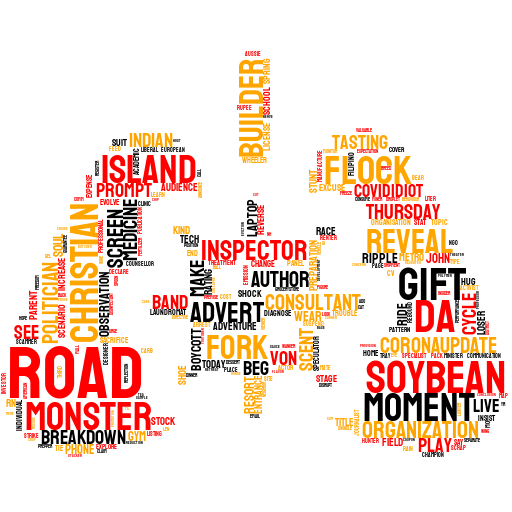

In [36]:
open_wordcloud('stylecloud.png')

## Modelado

In [105]:
data

UserName  ScreenName                      Location    TweetAt  \
0          3800       48752                            UK 2020-03-16   
1          3801       48753                     Vagabonds 2020-03-16   
2          3802       48754                           NaN 2020-03-16   
3          3803       48755                           NaN 2020-03-16   
4          3804       48756     ÃT: 36.319708,-82.363649 2020-03-16   
...         ...         ...                           ...        ...   
33439     44949       89901                          OHIO 2020-04-14   
33440     44950       89902                           NaN 2020-04-14   
33441     44952       89904                           NaN 2020-04-14   
33442     44953       89905                           NaN 2020-04-14   
33443     44955       89907  i love you so much || he/him 2020-04-14   

                                           OriginalTweet  Sentiment  \
0      advice Talk to your neighbours family to excha...          1   
1      Coronavirus Australia: Woolworths to give elde...          1   
2      My food stock is not the only one which is emp...          1   
3      Me, ready to go at supermarket during the #COV...          0   
4      As news of the regionÂs first confirmed COVID...          1   
...                                                  ...        ...   
33439  I never that weÂd be in a situation &amp; wor...          1   
33440  @MrSilverScott you are definitely my man. I fe...          1   
33441  Response to complaint not provided citing COVI...          0   
33442  You know itÂs getting tough when @KameronWild...          1   
33443  @TartiiCat Well new/used Rift S are going for ...          0   

       numero_palabras                                         text_clean  
0                   38  advice talk to your neighbours family to excha...  
1                   14  coronavirus australia woolworths to give elder...  
2                   42  my food stock is not the only one which is emp...  
3                   40  me ready to go at supermarket during the covid...  
4                   36  as news of the regionas first confirmed covid ...  
...                ...                                                ...  
33439               34  i never that wead be in a situation amp world ...  
33440               48  mrsilverscott you are definitely my man i feel...  
33441               23  response to complaint not provided citing covi...  
33442               18  you know itas getting tough when kameronwilds ...  
33443               46  tartiicat well new used rift s are going for 7...  

[33444 rows x 8 columns]

In [106]:
data["n_dots"] = data['OriginalTweet'].map(lambda x: x.count('.'))

In [107]:
data["n_letters"] = data["OriginalTweet"].map(lambda x:sum(map(str.isalpha, x)))
data["n_lower_ratio_letters"] = data["OriginalTweet"].map(lambda x:sum(map(str.islower, x))) / data["n_letters"]
data["n_upper_ratio_letters"] = data["OriginalTweet"].map(lambda x:sum(map(str.isupper, x))) / data["n_letters"]
data["n_emojis"] = data["OriginalTweet"].map(emoji.emoji_count)

In [108]:
data["n_emojis"].value_counts()

0    33412
1       28
4        3
2        1
Name: n_emojis, dtype: int64

In [109]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [110]:
cv = TfidfVectorizer(stop_words=stopwords, ngram_range=(1, 1), min_df=10, max_features=100)

In [111]:
data.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment', 'numero_palabras', 'text_clean', 'n_dots', 'n_letters',
       'n_lower_ratio_letters', 'n_upper_ratio_letters', 'n_emojis'],
      dtype='object')

In [112]:
ls_features=['numero_palabras','n_dots', 'n_letters',
       'n_lower_ratio_letters', 'n_upper_ratio_letters', 'n_emojis']

In [113]:
data[ls_features].isnull().sum()

numero_palabras          0
n_dots                   0
n_letters                0
n_lower_ratio_letters    0
n_upper_ratio_letters    0
n_emojis                 0
dtype: int64

In [114]:
cv.fit(data["text_clean"])

TfidfVectorizer(max_features=100, min_df=10,
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...])

In [115]:
X = data[ls_features].join(pd.DataFrame(data = cv.transform(data["text_clean"]).todense(), columns = cv.get_feature_names()))
y = data["Sentiment"]

In [116]:
X

numero_palabras  n_dots  n_letters  n_lower_ratio_letters  \
0                   38       0        200               0.985000   
1                   14       1        106               0.877358   
2                   42       6        220               0.727273   
3                   40       7        234               0.931624   
4                   36       1        197               0.934010   
...                ...     ...        ...                    ...   
33439               34       0        159               0.955975   
33440               48       2        198               0.944444   
33441               23       2        110               0.900000   
33442               18       0        110               0.963636   
33443               46       4        188               0.914894   

       n_upper_ratio_letters  n_emojis        19  also     amid       amp  \
0                   0.015000         0  0.000000   0.0  0.00000  0.000000   
1                   0.122642         0  0.230005   0.0  0.55072  0.000000   
2                   0.272727         0  0.119383   0.0  0.00000  0.000000   
3                   0.068376         0  0.000000   0.0  0.00000  0.000000   
4                   0.065990         0  0.165530   0.0  0.00000  0.000000   
...                      ...       ...       ...   ...      ...       ...   
33439               0.044025         0  0.000000   0.0  0.00000  0.379172   
33440               0.055556         0  0.218613   0.0  0.00000  0.000000   
33441               0.100000         0  0.261958   0.0  0.00000  0.000000   
33442               0.036364         0  0.000000   0.0  0.00000  0.000000   
33443               0.085106         0  0.182175   0.0  0.00000  0.000000   

       business  buy  buying        co  consumer  coronavirus  could  \
0           0.0  0.0     0.0  0.000000  0.000000     0.000000    0.0   
1           0.0  0.0     0.0  0.207453  0.000000     0.220602    0.0   
2           0.0  0.0     0.0  0.107677  0.000000     0.114502    0.0   
3           0.0  0.0     0.0  0.163764  0.000000     0.174144    0.0   
4           0.0  0.0     0.0  0.149299  0.000000     0.000000    0.0   
...         ...  ...     ...       ...       ...          ...    ...   
33439       0.0  0.0     0.0  0.000000  0.000000     0.219404    0.0   
33440       0.0  0.0     0.0  0.000000  0.000000     0.000000    0.0   
33441       0.0  0.0     0.0  0.000000  0.432818     0.000000    0.0   
33442       0.0  0.0     0.0  0.000000  0.000000     0.179118    0.0   
33443       0.0  0.0     0.0  0.000000  0.000000     0.000000    0.0   

          covid   covid19  covid2019  crisis  customers  day  delivery  \
0      0.000000  0.000000        0.0     0.0        0.0  0.0       0.0   
1      0.234023  0.000000        0.0     0.0        0.0  0.0       0.0   
2      0.121469  0.191893        0.0     0.0        0.0  0.0       0.0   
3      0.000000  0.291846        0.0     0.0        0.0  0.0       0.0   
4      0.168421  0.000000        0.0     0.0        0.0  0.0       0.0   
...         ...       ...        ...     ...        ...  ...       ...   
33439  0.000000  0.000000        0.0     0.0        0.0  0.0       0.0   
33440  0.222432  0.000000        0.0     0.0        0.0  0.0       0.0   
33441  0.266534  0.000000        0.0     0.0        0.0  0.0       0.0   
33442  0.000000  0.000000        0.0     0.0        0.0  0.0       0.0   
33443  0.185357  0.000000        0.0     0.0        0.0  0.0       0.0   

       demand  due  employees  essential  even  every  everyone      food  \
0         0.0  0.0        0.0        0.0   0.0    0.0  0.000000  0.000000   
1         0.0  0.0        0.0        0.0   0.0    0.0  0.000000  0.000000   
2         0.0  0.0        0.0        0.0   0.0    0.0  0.276787  0.338164   
3         0.0  0.0        0.0        0.0   0.0    0.0  0.000000  0.257154   
4         0.0  0.0        0.0        0.0   0.0    0.0  0.000000  0.234440   
...       ...  ...        ...        ...   ...   

In [49]:
from sklearn.feature_selection import SelectKBest, f_classif

In [117]:
kb = SelectKBest(k = 10, score_func = f_classif)

In [118]:
kb.fit(X, y)

SelectKBest()

In [119]:
ls_best = [x for x, y in zip(X.columns, kb.get_support()) if y]

In [120]:
ls_best

['buying',
 'crisis',
 'free',
 'hand',
 'help',
 'like',
 'panic',
 'safe',
 'sanitizer',
 'thank']

In [121]:
from sklearn.model_selection import train_test_split

In [122]:
X = X[ls_best]

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [123]:
from sklearn.naive_bayes import MultinomialNB

In [124]:
bayes=MultinomialNB()

In [125]:
bayes.fit(X_train, y_train,)

MultinomialNB()

In [126]:
from sklearn.metrics import roc_auc_score,accuracy_score,confusion_matrix

def metricas(model,Xv,yv): #Mide efectividad de un Modelo Predictivo
    print( " Roc Validate: %.3f" %roc_auc_score(y_score=model.predict_proba(Xv)[:,1],y_true=yv))
    print( " Acc Validate: %.3f" %accuracy_score(y_pred=model.predict(Xv),y_true=yv))
    print( " Matrix Conf Validate: ", "\n",confusion_matrix(y_pred=model.predict(Xv),y_true=yv))

In [72]:
metricas(bayes,X_train, y_train)

 Roc Validate: 0.686
 Acc Validate: 0.611
 Matrix Conf Validate:  
 [[ 2452  9176]
 [  570 12885]]


In [60]:
metricas(bayes,X_test, y_test)

 Roc Validate: 0.685
 Acc Validate: 0.622
 Matrix Conf Validate:  
 [[ 818 2952]
 [ 209 4382]]


In [127]:
from sklearn.model_selection import cross_val_score

In [128]:
ls_scores = cross_val_score(X=X_train, y=y_train, cv=4, n_jobs=-1, estimator=bayes, scoring="roc_auc")

In [129]:
ls_scores

array([0.6780056 , 0.6815335 , 0.69724131, 0.6892746 ])

In [130]:
np.mean(ls_scores), np.std(ls_scores)

(0.686513753699614, 0.007414420136451204)

In [131]:
from sklearn.metrics import plot_roc_curve

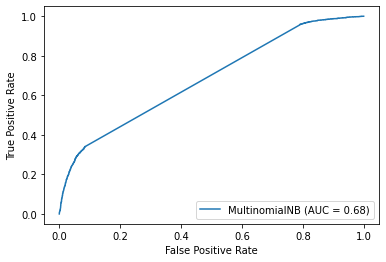

In [132]:
plot_roc_curve(bayes,X_test,y_test,drop_intermediate=False)

In [67]:
X_test

buying    crisis  free      hand  help  like  panic      safe  \
21979  0.000000  0.000000   0.0  0.000000   0.0   0.0    0.0  0.000000   
23344  0.000000  0.000000   0.0  0.000000   0.0   0.0    0.0  0.000000   
17482  0.000000  0.000000   0.0  0.541424   0.0   0.0    0.0  0.000000   
28324  0.000000  0.297394   0.0  0.000000   0.0   0.0    0.0  0.337493   
30633  0.000000  0.000000   0.0  0.000000   0.0   0.0    0.0  0.000000   
...         ...       ...   ...       ...   ...   ...    ...       ...   
13864  0.000000  0.000000   0.0  0.000000   0.0   0.0    0.0  0.000000   
4900   0.000000  0.000000   0.0  0.000000   0.0   0.0    0.0  0.000000   
11302  0.000000  0.425550   0.0  0.000000   0.0   0.0    0.0  0.000000   
102    0.788439  0.000000   0.0  0.000000   0.0   0.0    0.0  0.000000   
3961   0.000000  0.000000   0.0  0.000000   0.0   0.0    0.0  0.000000   

       sanitizer  thank  
21979   0.000000    0.0  
23344   0.000000    0.0  
17482   0.530862    0.0  
28324   0.000000    0.0  
30633   0.000000    0.0  
...          ...    ...  
13864   0.000000    0.0  
4900    0.000000    0.0  
11302   0.000000    0.0  
102     0.000000    0.0  
3961    0.000000    0.0  

[8361 rows x 10 columns]

In [133]:
X_test.iloc[1]



buying       0.0
crisis       0.0
free         0.0
hand         0.0
help         0.0
like         0.0
panic        0.0
safe         0.0
sanitizer    0.0
thank        0.0
Name: 8722, dtype: float64

In [134]:
bayes.predict(X_test.iloc[1])

ValueError: Expected 2D array, got 1D array instead:
array=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [135]:
np.array(X_test.iloc[1]).reshape(-1, 1).T

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [136]:
bayes.predict(np.array(X_test.iloc[1]).reshape(-1, 1).T)

array([1])